### Unpickling the cleaned and filtered data frame for univariate, bivariate and multivariate analysis

After we pickled the data frame with the cleaned and filtered data, we have to unpickle such data frame.

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

from matplotlib.collections import LineCollection

# Use seaborn style defaults and set the default figure size
import seaborn as sns
sns.set(rc={'figure.figsize':(11, 6)})

# from sklearn.pipeline import make_pipeline

# from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

import pingouin as pg

In [2]:
#To unpickle the data frame

data_food_facts_filtered_by_relevant_variables = pd.read_pickle("./pickle_data_cleaned.pkl")

## Exploratory analysis of the data: Univariate analysis

The following function creates an histogram to visualize each of the numeric variables distributions.

In [3]:
def func_histogram_indicators(data,column,x_label,graph_title):
    data[column].hist(bins=100)
    plt.xlabel(x_label)
    plt.ylabel('count')
    plt.title(graph_title)

### Distribution of nutrition-score-fr_100g

C:\Users\ASUS\anaconda3\lib\site-packages\outdated\utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.4.0, the latest is 0.5.0.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


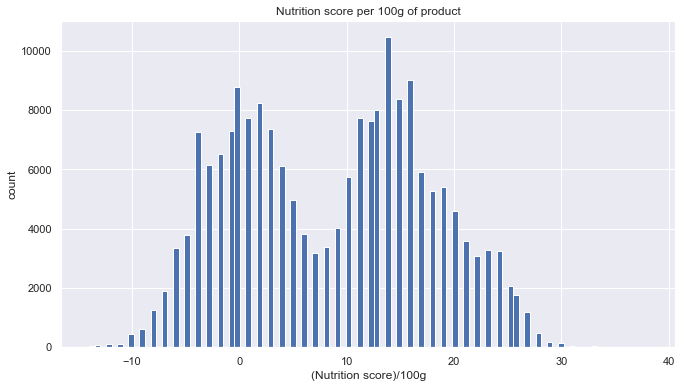

In [4]:
func_histogram_indicators(data_food_facts_filtered_by_relevant_variables,'nutrition-score-fr_100g','(Nutrition score)/100g','Nutrition score per 100g of product')

### Distribution of cholesterol_100g

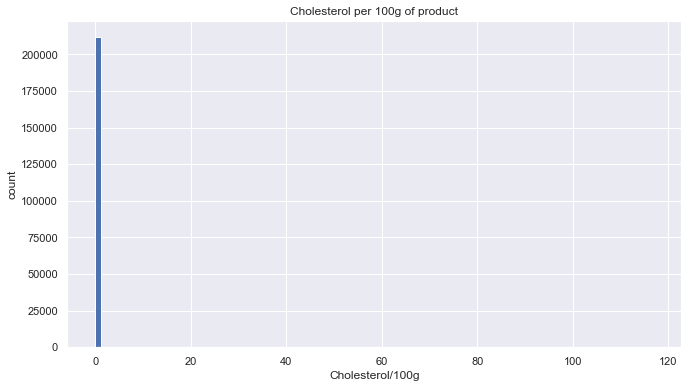

In [5]:
func_histogram_indicators(data_food_facts_filtered_by_relevant_variables,'cholesterol_100g','Cholesterol/100g','Cholesterol per 100g of product')

### Distribution of sodium_100g

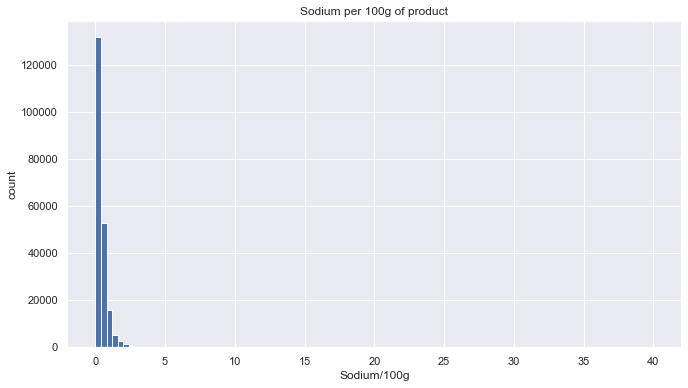

In [6]:
func_histogram_indicators(data_food_facts_filtered_by_relevant_variables,'sodium_100g','Sodium/100g','Sodium per 100g of product')

### Distribution of salt_100g


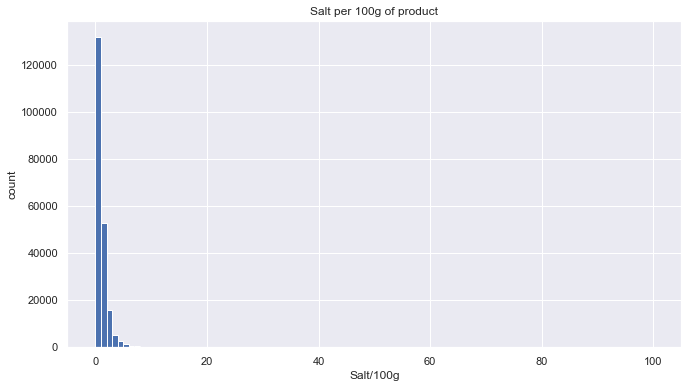

In [7]:
func_histogram_indicators(data_food_facts_filtered_by_relevant_variables,'salt_100g','Salt/100g','Salt per 100g of product')

### Distribution of saturated-fat_100g

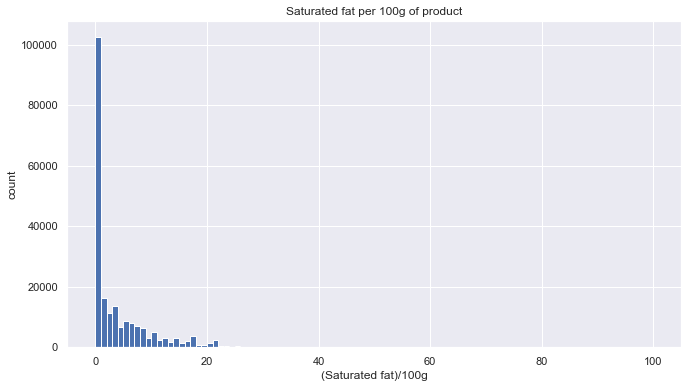

In [8]:
func_histogram_indicators(data_food_facts_filtered_by_relevant_variables,'saturated-fat_100g','(Saturated fat)/100g','Saturated fat per 100g of product')

### Distribution of fat_100g

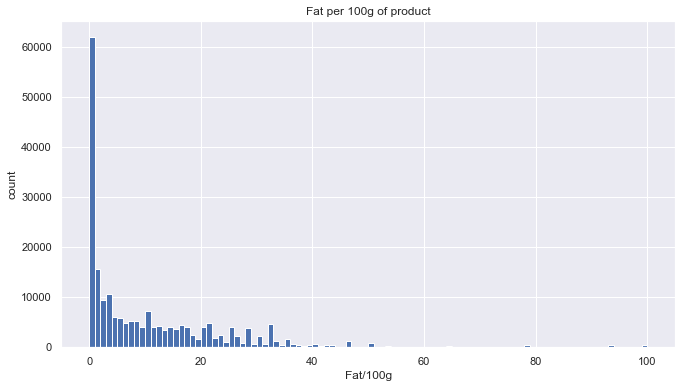

In [9]:
func_histogram_indicators(data_food_facts_filtered_by_relevant_variables,'fat_100g','Fat/100g','Fat per 100g of product')

### Distribution of trans-fat_100g

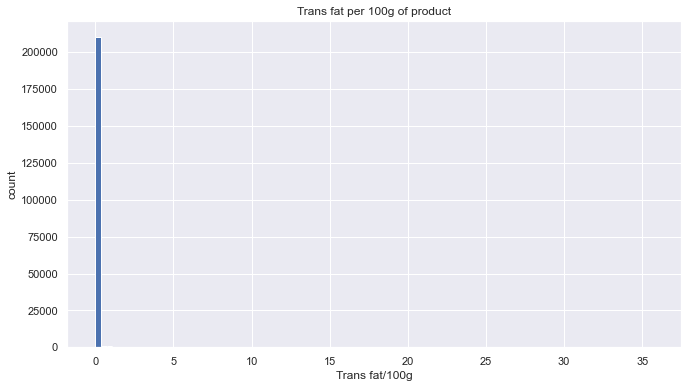

In [10]:
func_histogram_indicators(data_food_facts_filtered_by_relevant_variables,'trans-fat_100g','Trans fat/100g','Trans fat per 100g of product')

### Distribution of carbohydrates_100g

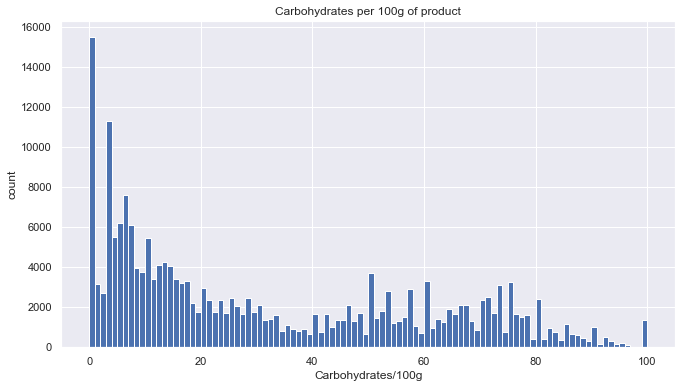

In [11]:
func_histogram_indicators(data_food_facts_filtered_by_relevant_variables,'carbohydrates_100g','Carbohydrates/100g','Carbohydrates per 100g of product')

### Distribution of proteins_100g

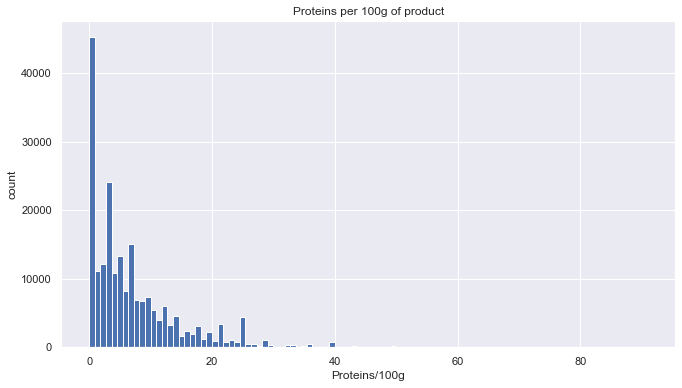

In [12]:
func_histogram_indicators(data_food_facts_filtered_by_relevant_variables,'proteins_100g','Proteins/100g','Proteins per 100g of product')

### Distribution of fiber_100g

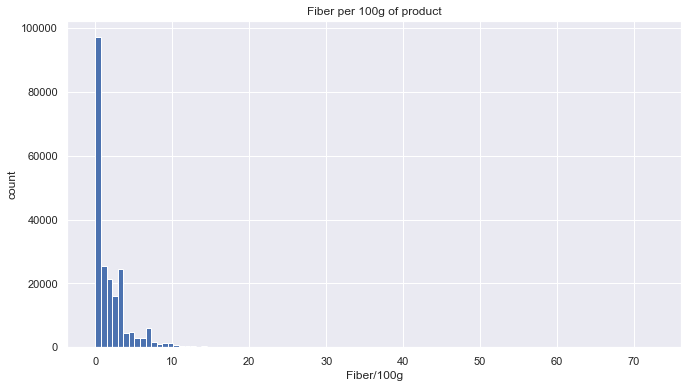

In [13]:
func_histogram_indicators(data_food_facts_filtered_by_relevant_variables,'fiber_100g','Fiber/100g','Fiber per 100g of product')

### Distribution of	energy_100g

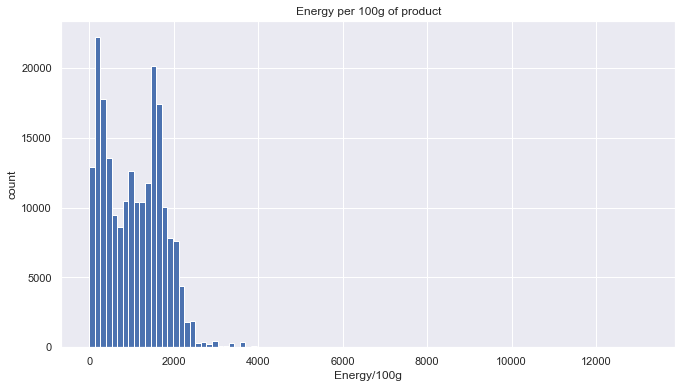

In [14]:
func_histogram_indicators(data_food_facts_filtered_by_relevant_variables,'energy_100g','Energy/100g','Energy per 100g of product')

### Distribution of	sugars_100g

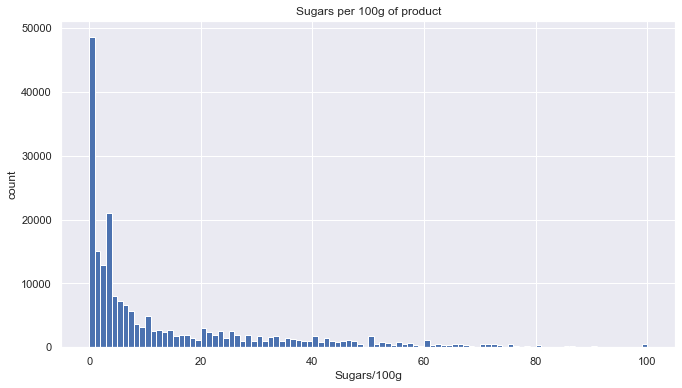

In [15]:
func_histogram_indicators(data_food_facts_filtered_by_relevant_variables,'sugars_100g','Sugars/100g','Sugars per 100g of product')

### Most reported products by product name

The following function creates a graph to visualize a top 20 of reported products, brands, categories and additives.

In [16]:
def func_top_20(data, column_y, y_label, graph_name):
    plt.figure(figsize=(15,8))
    sns.countplot(y=column_y, data=data, order=data[column_y].value_counts().iloc[:20].index)
    plt.xlabel('Number of products')
    plt.ylabel(y_label)
    plt.title(graph_name)


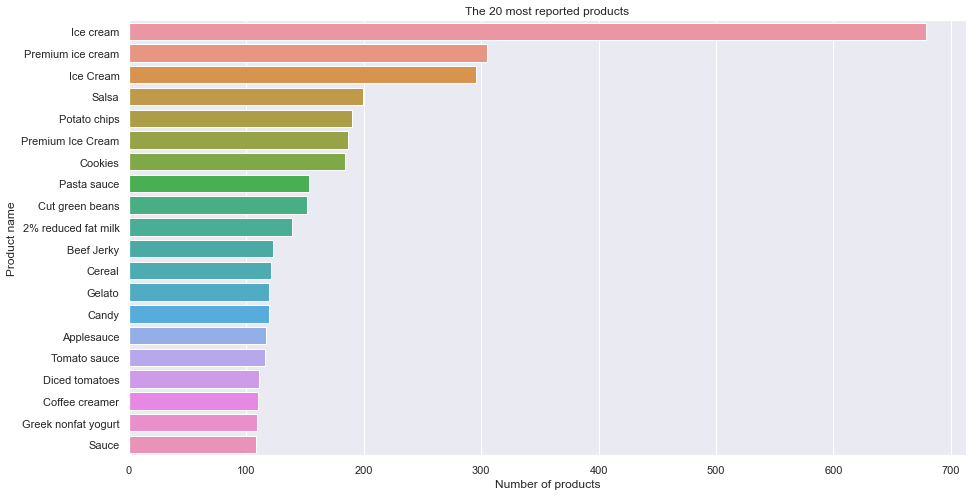

In [17]:
func_top_20(data_food_facts_filtered_by_relevant_variables, 'product_name', 'Product name', 'The 20 most reported products')

### Most reported brands of products

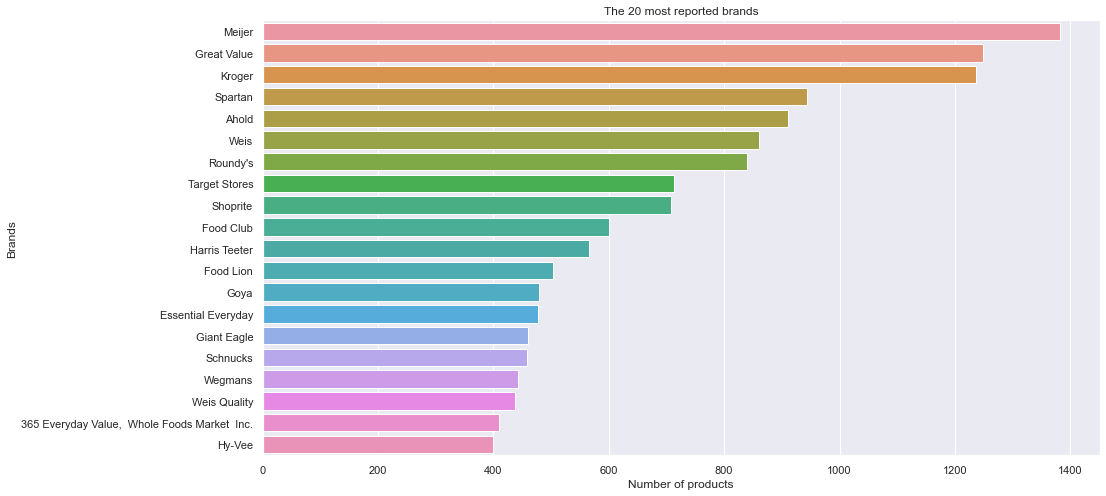

In [18]:
func_top_20(data_food_facts_filtered_by_relevant_variables, 'brands', 'Brands', 'The 20 most reported brands')

### Most reported main categories of products

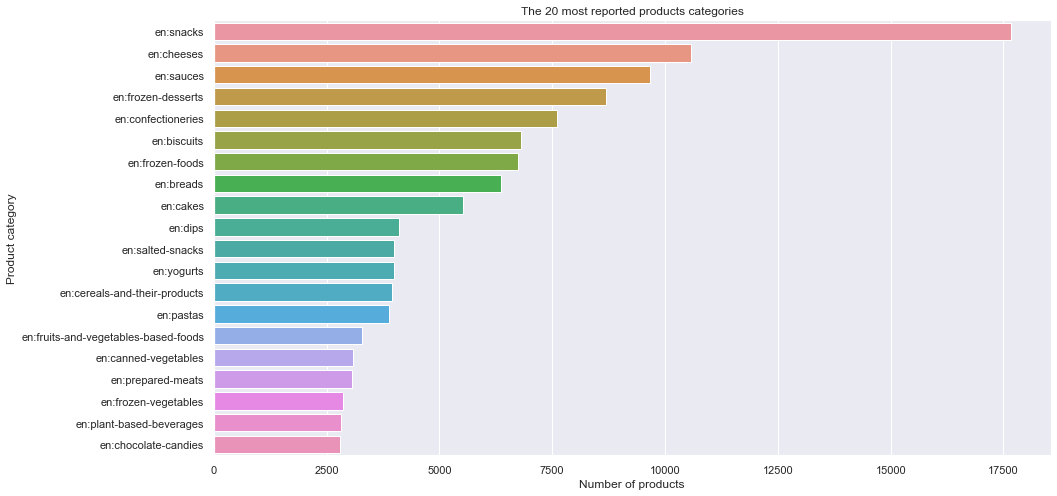

In [19]:
func_top_20(data_food_facts_filtered_by_relevant_variables, 'main_category', 'Product category', 'The 20 most reported products categories')

### Most reported additives

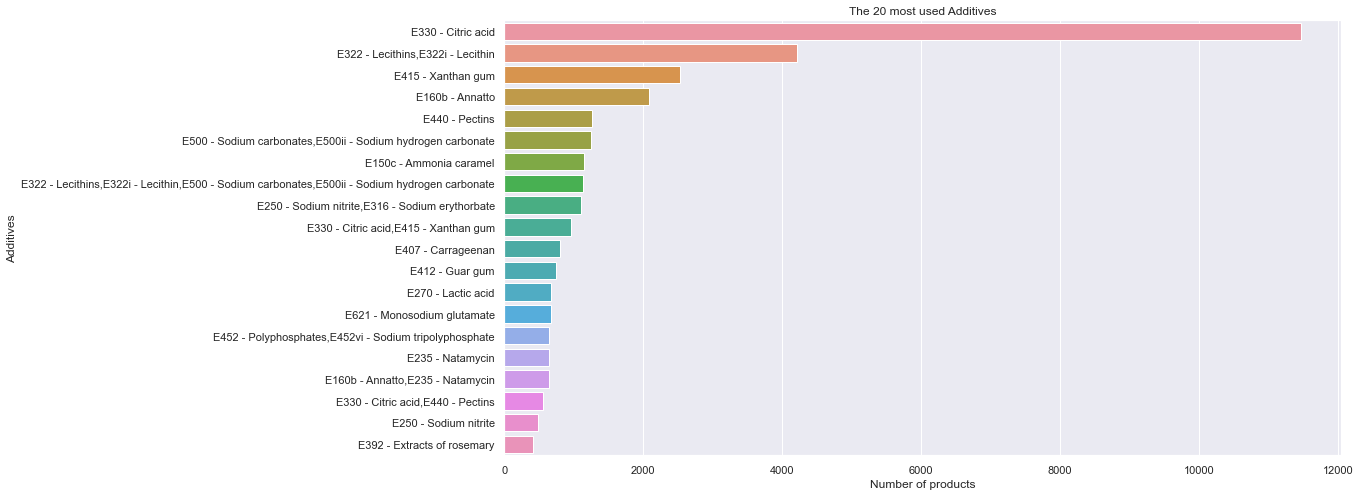

In [20]:
func_top_20(data_food_facts_filtered_by_relevant_variables, 'additives_en', 'Additives', 'The 20 most used Additives')

### Availability of products: number of countries and stores where a product is available

**The following function counts the number of words in the countries and stores columns. It receives the row of the data frame and returns a number that corresponds to the number of countries and stores where a determined product is available.**

**The function is used to quantify the number of countries and stores where the products are available.**

In [21]:
def count_colons(row):
    if isinstance(row, str):
        return row.count(',') + 1

The following dataframe contains a new column with the number of countries and stores where a determined product is mostly available.

In [22]:
list_count_of_countries = data_food_facts_filtered_by_relevant_variables['countries'].apply(count_colons).tolist()
list_count_of_stores = data_food_facts_filtered_by_relevant_variables['stores'].apply(count_colons).tolist()

data_food_facts_filtered_by_relevant_variables['number_of_countries_product_is_available'] = list_count_of_countries
data_food_facts_filtered_by_relevant_variables['number_of_stores_product_is_available'] = list_count_of_stores

### Availability of products: number of countries where a product is available

In [23]:
def func_top_20_two_variables(y_var, x_var, data, palette, x_label, y_label, graph_name):
    plt.figure(figsize=(15,8))
    sns.barplot(y=y_var, x=x_var, data=data.nlargest(20,columns=x_var), palette=palette)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(graph_name)

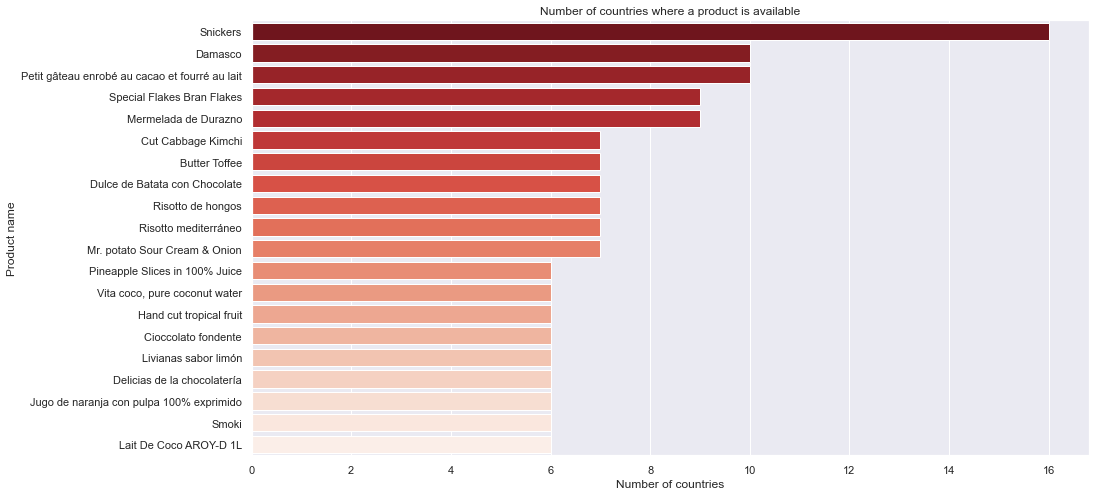

In [24]:
func_top_20_two_variables('product_name', 'number_of_countries_product_is_available', data_food_facts_filtered_by_relevant_variables, 'Reds_r', 'Number of countries', 'Product name', 'Number of countries where a product is available')

### Availability of products: number of stores where a product is available

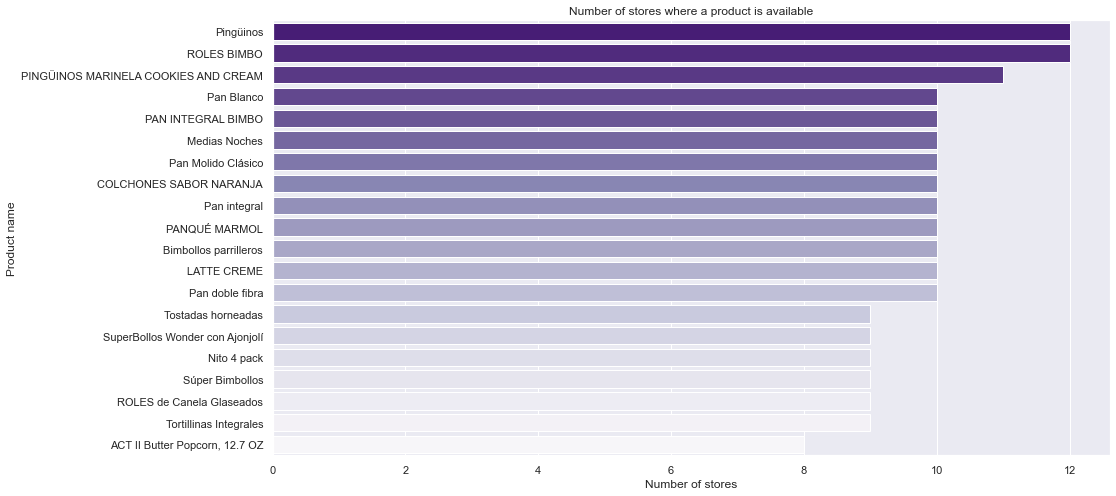

In [25]:
func_top_20_two_variables('product_name', 'number_of_stores_product_is_available', data_food_facts_filtered_by_relevant_variables, 'Purples_r', 'Number of stores', 'Product name', 'Number of stores where a product is available')

### Most reported products with their salt content

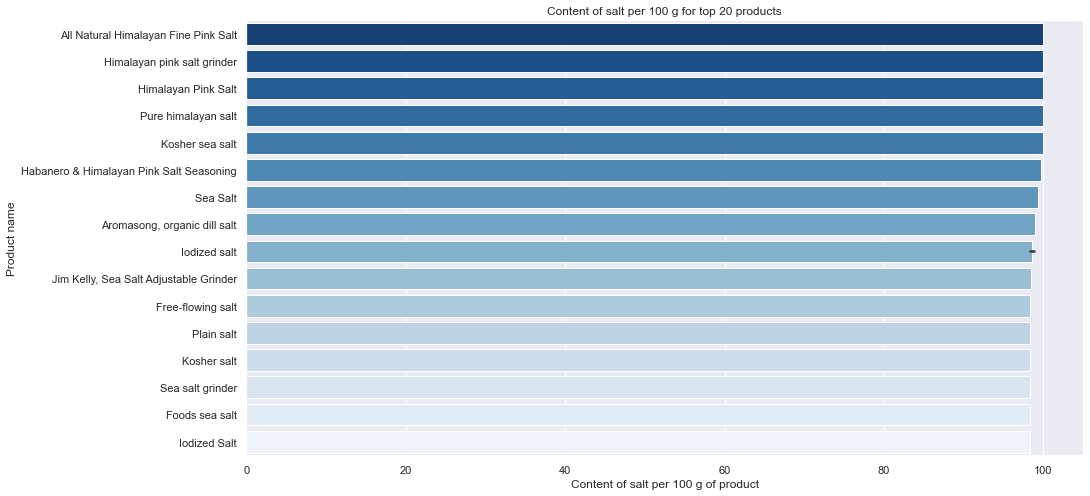

In [26]:
func_top_20_two_variables('product_name', 'salt_100g', data_food_facts_filtered_by_relevant_variables, 'Blues_r', 'Content of salt per 100 g of product', 'Product name', 'Content of salt per 100 g for top 20 products')

## Exploratory analysis of the data: Bivariate and multivariate analysis

### Correlation matrix

We will calculate the pairwise correlation between columns and return a correlation matrix. We used the corr() function with the Kendall correlation coefficient, which measures the monotonic relationship between two variables. It does not require the variables to be normally distributed. (See reference https://www.learnpythonwithrune.org/pandas-correlation-methods-explained-pearson-kendall-and-spearman/)

In [27]:
correlation_matrix = data_food_facts_filtered_by_relevant_variables.corr(method='kendall')

C:\Users\ASUS\anaconda3\lib\site-packages\scipy\stats\stats.py:4812: RuntimeWarning: overflow encountered in longlong_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


In [28]:
# print(correlation_matrix)

<AxesSubplot:>

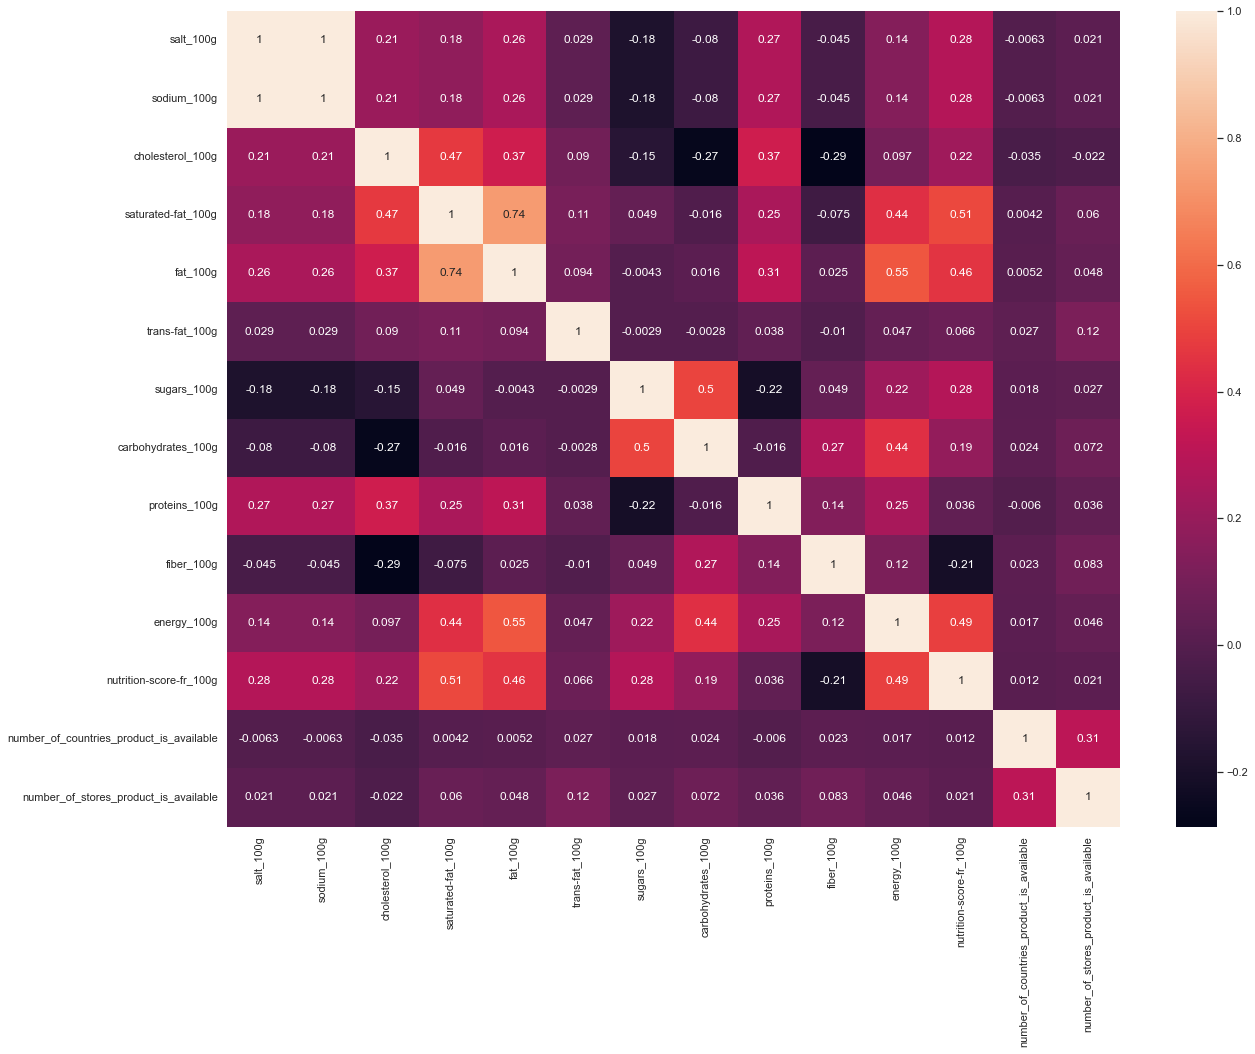

In [29]:
plt.figure(figsize=(20,15))
sns.heatmap(correlation_matrix, xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns, annot=True)

The correlation matrix allows us to identify correlations between pairs of variables as we will see next.

### Nutriscore_grade and fat per 100g

Nutriscore grade correlation with the content of fat and salt per 100g of the reported products can be represented with a boxplot. The nutriscore classification can be also represented with the color code corresponding to each letter from "a" to "e".

In [30]:
def func_boxplot_two_variables(x_var, y_var, data, x_label, y_label, graph_name):
    my_pal = {"a": "green", "b": "limegreen", "c":"yellow", "d":"darkorange", "e":"orangered"}
    sns.boxplot(x=x_var, y=y_var, data=data, showfliers = False, order = ['a','b','c','d','e'], palette=my_pal)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(graph_name)

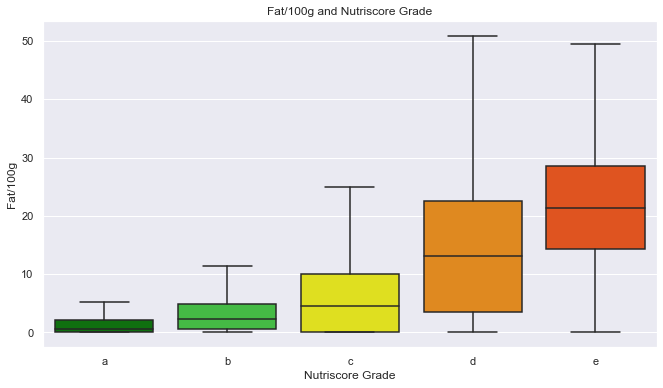

In [31]:
func_boxplot_two_variables('nutriscore_grade', 'fat_100g', data_food_facts_filtered_by_relevant_variables, 'Nutriscore Grade', 'Fat/100g', 'Fat/100g and Nutriscore Grade')

### Nutriscore_grade and salt per 100g

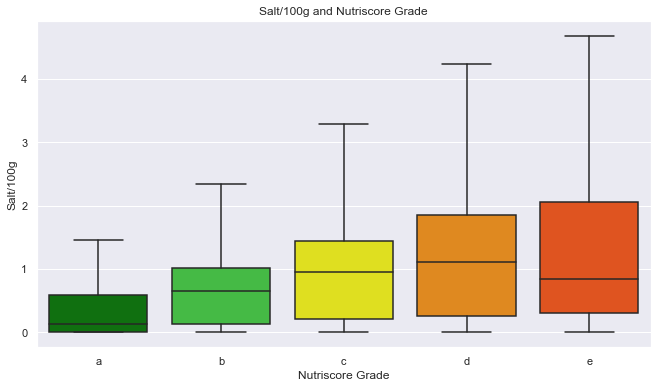

In [32]:
func_boxplot_two_variables('nutriscore_grade', 'salt_100g', data_food_facts_filtered_by_relevant_variables, 'Nutriscore Grade', 'Salt/100g', 'Salt/100g and Nutriscore Grade')

### Nutriscore_grade and countries

Another interesting representation corresponds also to the number of countries and stores and the persistence of reported products of categories "a" to "e" from the nutriscore grade.

In [33]:
def func_catplot_two_variables(x_var, y_var, data, x_label, y_label, graph_name):
    plt.figure(figsize=(15,10))
    my_pal = {"a": "green", "b": "limegreen", "c":"yellow", "d":"darkorange", "e":"orangered"}
    sns.catplot(x=x_var, y=y_var, data=data, palette=my_pal, order = ['a','b','c','d','e'])
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(graph_name)

<Figure size 1080x720 with 0 Axes>

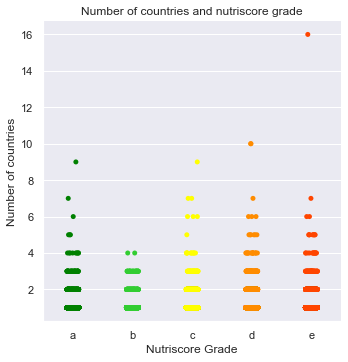

In [34]:
func_catplot_two_variables('nutriscore_grade', 'number_of_countries_product_is_available', data_food_facts_filtered_by_relevant_variables, 'Nutriscore Grade', 'Number of countries', 'Number of countries and nutriscore grade')

### Nutriscore_grade and stores

<Figure size 1080x720 with 0 Axes>

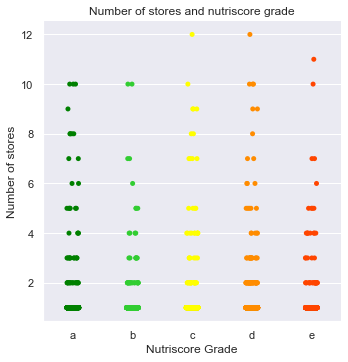

In [35]:
func_catplot_two_variables('nutriscore_grade', 'number_of_stores_product_is_available', data_food_facts_filtered_by_relevant_variables, 'Nutriscore Grade', 'Number of stores', 'Number of stores and nutriscore grade')

### Relation fat-nutrition score per 100g of product

The relation between fat and salt content per 100g of reported products and the nutrition score points from -15 to 40 is also represented in the following scatter plots.

In [36]:
def func_relplot_two_variables(x_var, y_var, data, x_label, y_label, graph_name):
    plt.figure(figsize=(15,10))
    my_pal = {"a": "green", "b": "limegreen", "c":"yellow", "d":"darkorange", "e":"orangered"}
    sns.relplot(x=x_var, y=y_var,  hue='nutriscore_grade', data=data, palette=my_pal)
    plt.ylabel(y_label)
    plt.xlabel(x_label)
    plt.title(graph_name)

<Figure size 1080x720 with 0 Axes>

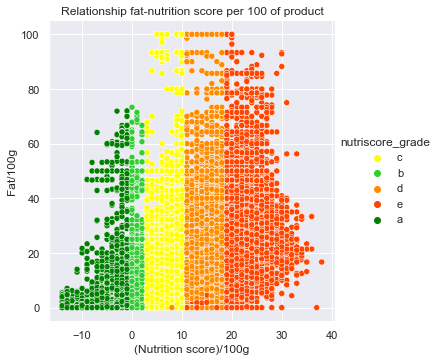

In [37]:
func_relplot_two_variables('nutrition-score-fr_100g', 'fat_100g', data_food_facts_filtered_by_relevant_variables, '(Nutrition score)/100g', 'Fat/100g', 'Relationship fat-nutrition score per 100 of product')

### Relation salt-nutrition score per 100g of product

<Figure size 1080x720 with 0 Axes>

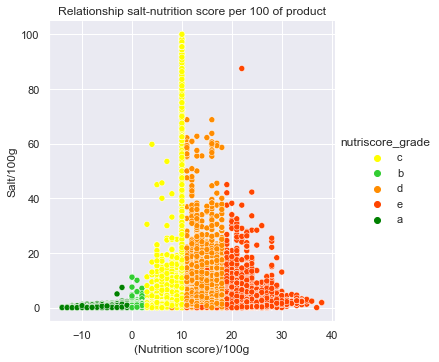

In [38]:
func_relplot_two_variables('nutrition-score-fr_100g', 'salt_100g', data_food_facts_filtered_by_relevant_variables, '(Nutrition score)/100g', 'Salt/100g', 'Relationship salt-nutrition score per 100 of product')

## Treating missing values for PCA and ANOVA analysis

In [39]:
data_food_facts_filtered_by_relevant_variables.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213996 entries, 287 to 2049497
Data columns (total 24 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   product_name                              213754 non-null  object 
 1   brands                                    119162 non-null  object 
 2   categories                                198637 non-null  object 
 3   stores                                    5504 non-null    object 
 4   countries                                 213979 non-null  object 
 5   additives_en                              144206 non-null  object 
 6   main_category                             198637 non-null  object 
 7   salt_100g                                 213996 non-null  float64
 8   sodium_100g                               213996 non-null  float64
 9   cholesterol_100g                          212254 non-null  float64
 10  saturated-fat_100

To copy a new data frame from an existing one. To avoid modifications on the old data frame we use the method copy(). See refs:

https://linuxhint.com/create-a-new-dataframe-from-an-existing-dataframe-in-pandas/

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.copy.html

In [40]:
new_df_data_food_facts_filtered_by_relevant_variables = data_food_facts_filtered_by_relevant_variables.copy()

We will replace NaN values from the numerical variables with zeros.

In [41]:
for i in new_df_data_food_facts_filtered_by_relevant_variables.columns:
    if '100g' in i:
        new_df_data_food_facts_filtered_by_relevant_variables[i] = new_df_data_food_facts_filtered_by_relevant_variables[i].fillna(0)
    elif 'is_available' in i:
        new_df_data_food_facts_filtered_by_relevant_variables[i] = new_df_data_food_facts_filtered_by_relevant_variables[i].fillna(0)

In [42]:
new_df_data_food_facts_filtered_by_relevant_variables.head()

,product_name,brands,categories,stores,countries,additives_en,main_category,salt_100g,sodium_100g,cholesterol_100g,...,carbohydrates_100g,proteins_100g,fiber_100g,energy_100g,nutrition-score-fr_100g,nutriscore_grade,image_ingredients_url,code,number_of_countries_product_is_available,number_of_stores_product_is_available
287,Cranberries,Torn & Glasser,"Plant-based foods and beverages, Plant-based f...",NaN,United States,NaN,en:cranberries,0.00000,0.000000,0.0,...,83.33,0.00,10.0,1255.0,3.0,c,NaN,0000000043595,1.0,0.0
289,Turkish Apricots,Northgate,NaN,NaN,United States,E220 - Sulphur dioxide,NaN,0.00000,0.000000,0.0,...,62.50,2.50,7.5,1046.0,0.0,NaN,NaN,0000000045292,1.0,0.0
291,Granola Honey Almonds,Northgate,NaN,NaN,United States,NaN,NaN,0.11430,0.045720,0.0,...,60.00,9.09,7.3,1674.0,0.0,NaN,NaN,0000000045346,1.0,0.0
292,Chili Mango,Torn & Glasses,NaN,NaN,United States,E330 - Citric acid,NaN,1.96850,0.787400,0.0,...,87.50,2.50,2.5,1569.0,0.0,NaN,NaN,0000000045421,1.0,0.0
320,Fresh Organic Carrots,Bunny-Luv,NaN,NaN,United States,NaN,NaN,0.19558,0.078232,0.0,...,8.97,1.28,2.6,159.0,0.0,NaN,NaN,0000000069601,1.0,0.0


### PCA analysis

For the PCA analysis we will keep numerical variables that are interesting to investigate and that will be specified in the list "columns_for_PCA". 
The idea is to determine if possible the relationship between such variables and the nutriscore clasification.

In [43]:
columns_for_PCA = ['saturated-fat_100g', 'fat_100g', 'carbohydrates_100g', 'energy_100g', 'sugars_100g', 'nutriscore_grade']

Next we will create a data frame that contains only the variables of interest for the PCA analysis.

In [44]:
data_subset_for_PCA = new_df_data_food_facts_filtered_by_relevant_variables[columns_for_PCA]

In [45]:
data_subset_for_PCA.describe()

,saturated-fat_100g,fat_100g,carbohydrates_100g,energy_100g,sugars_100g
count,213996.000000,213996.000000,213996.000000,213996.000000,213996.000000
mean,4.075873,10.715881,32.021267,1052.934768,14.329648
std,6.299592,13.521522,27.762173,688.246798,19.087392
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.220000,7.140000,402.000000,1.300000
50%,1.250000,5.360000,22.350000,1046.000000,5.000000
75%,6.160000,17.020000,56.250000,1582.000000,21.840000
max,100.000000,100.000000,100.000000,13213.000000,100.000000


We will create a new data frame to perform run the PCA analysis.

In [46]:
new_data_subset_for_PCA = data_subset_for_PCA.copy()

In [47]:
new_data_subset_for_PCA.head()

,saturated-fat_100g,fat_100g,carbohydrates_100g,energy_100g,sugars_100g,nutriscore_grade
287,0.00,0.00,83.33,1255.0,66.67,c
289,0.00,0.00,62.50,1046.0,52.50,NaN
291,2.73,14.55,60.00,1674.0,21.82,NaN
292,0.00,2.50,87.50,1569.0,65.00,NaN
320,0.00,0.00,8.97,159.0,6.41,NaN


The following two cells are functions extracted from the Open Classrooms documentation from the course "Réalisez une analyse exploratoire de données". They are avaibale in GitHub, as indicated in their corresponding links.

The next cell contains a function that draws the correlation circles. The following correlation circles visualize the correlation between the first four principal components and the original dataset features. In such correlations  are shown via coordinates.
http://rasbt.github.io/mlxtend/user_guide/plotting/plot_pca_correlation_graph/ 

In [48]:
# Extracted from OP gitcode. See reference:
#https://github.com/stenier-oc/realisez-une-analyse-de-donnees-exploratoire/blob/master/functions.py

def display_circles(components_pca, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks: # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            ax = plt.subplots(figsize=(7,6))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif components_pca.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(components_pca[d1,:]), max(components_pca[d1,:]), min(components_pca[d2,:]), max(components_pca[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if components_pca.shape[1] < 30 :
                plt.quiver(np.zeros(components_pca.shape[1]), np.zeros(components_pca.shape[1]),
                   components_pca[d1,:], components_pca[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in components_pca[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(components_pca[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Correlation circle (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

The next cell contains a function that draws the projected data into the factorial planes for the first four principal components.

In [49]:
# Extracted from OP gitcode. See reference:
#https://github.com/stenier-oc/realisez-une-analyse-de-donnees-exploratoire/blob/master/functions.py

def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, alpha=1, illustrative_var=None):
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # initialisation de la figure       
            plt.figure(figsize=(10,8))
        
            # affichage des points
            if illustrative_var is None:
                sns.scatterplot(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    sns.scatterplot(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()

            # # affichage des labels des points
            # if labels is not None:
            #     for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
            #         plt.text(x, y, labels[i], fontsize='14', ha='center',va='center') 
                
            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projected data (sur F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)
            # plt.colorbar()

For the PCA calculation the data is first standardized via z-score standardization. Then the right number of dimensions (k) is chosen so that the number of principal components is equal to the number of variables of the dataset and see how well PCA captures the variance of the data.

https://towardsdatascience.com/principal-component-analysis-pca-with-scikit-learn-1e84a0c731b0

The data projected into the principal components is shown in the form of array.

In [50]:
#Code extracted from https://stackoverflow.com/questions/22984335/recovering-features-names-of-explained-variance-ratio-in-pca-with-sklearn
# normalize data
df_norm = (new_data_subset_for_PCA[columns_for_PCA].drop(columns=['nutriscore_grade']) - new_data_subset_for_PCA[columns_for_PCA].drop(columns=['nutriscore_grade']).mean()) / new_data_subset_for_PCA[columns_for_PCA].drop(columns=['nutriscore_grade']).std()
features = new_data_subset_for_PCA[columns_for_PCA].drop(columns=['nutriscore_grade']).columns
names = new_data_subset_for_PCA[columns_for_PCA].drop(columns=['nutriscore_grade']).index

# PCA
pca = PCA(n_components=5)
pca_result = pca.fit_transform(df_norm.values)
pca_result

array([[ 0.89987516, -3.22484045, -0.86203918, -0.32498178, -0.098983  ],
       [ 0.25663356, -2.34871816, -0.75507116, -0.31366293,  0.01663713],
       [ 1.01798865, -0.83210284,  0.60574366, -0.11956527, -0.00963071],
       ...,
       [ 0.12764192, -1.47076083,  1.61804088,  0.95770369, -0.18944649],
       [-1.85095334,  0.3108466 , -0.35447837, -0.12328322, -0.06408743],
       [-2.19221808,  0.59719921, -0.33114341, -0.03569895, -0.08824767]])

In [51]:
pca_result.shape

(213996, 5)

The explained_variance_ratio_ attribute of the PCA() class returns a one-dimensional numpy array which contains the values of the percentage of variance explained by each of the selected components.

https://towardsdatascience.com/principal-component-analysis-pca-with-scikit-learn-1e84a0c731b0

In [52]:
print(pca.explained_variance_ratio_ * 100)

[50.64387975 34.83644335  9.31494433  4.53449842  0.67023416]


According to the previous result, the first component alone captures about 50.64% of the variability in the dataset and the second component alone captures about 34.83% of the variability in the dataset and so on. 

In [53]:
print("Variance explained by all 5 components = ", sum(pca.explained_variance_ratio_ * 100))

Variance explained by all 5 components =  100.0


If we have set a number of principal components equal to 5 and the original number of dimensions in our dataset is also 5, we have not reduced the dimensionality (we’ve just transformed the data). Therefore, the percentage of variance explained by 5 principal components should be 100%, as shown in the previous result.

In [54]:
# print(pca.components_)

By executing the function display_circles() we obtain the correlation circles.

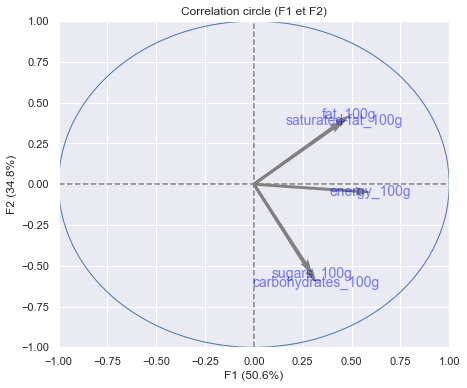

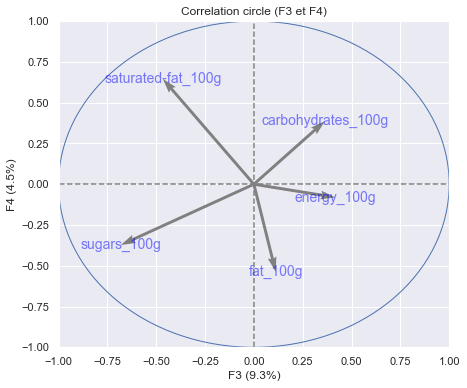

In [55]:
# Code extracted from OP example
# Cercle des corrélations
# https://github.com/stenier-oc/realisez-une-analyse-de-donnees-exploratoire/blob/master/pca_my_courses.py
components_pca = pca.components_
display_circles(components_pca, 5, pca, [(0,1),(2,3),(4,5)], labels = np.array(features))

By executing the function display_factorial_planes() we obtain the projected data represented into the factorial planes.

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


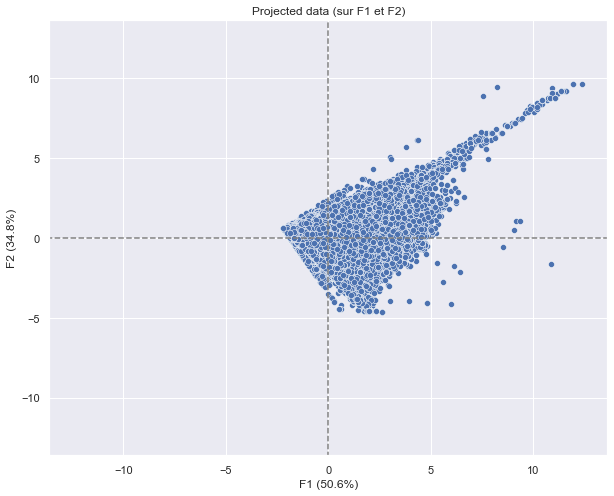

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


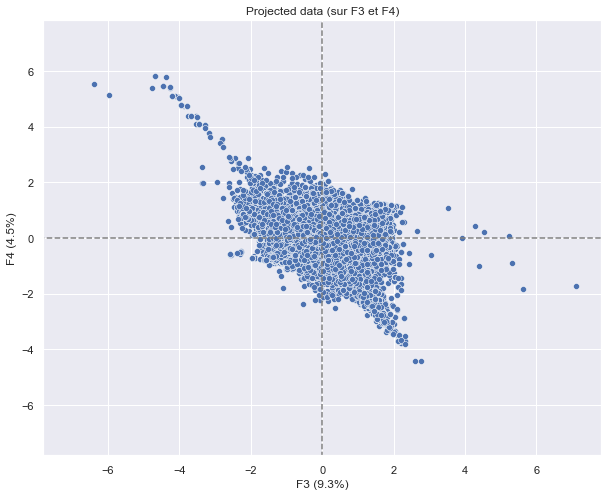

In [56]:
# Code extracted from OP example
# Projection des individus
# https://github.com/stenier-oc/realisez-une-analyse-de-donnees-exploratoire/blob/master/pca_my_courses.py
X_projected = pca_result
display_factorial_planes(X_projected, 5, pca, [(0,1),(2,3),(4,5)])

We created the following data frame to represent the projected data into the factorial plane. This time the data frame contains the nutriscore_grade variable so we could represent the projected data points with the corresponding nutriscore classification color as shown in the upcoming graphs.

In [57]:
new_data_subset_for_PCA = new_data_subset_for_PCA[columns_for_PCA]
new_data_subset_for_PCA['F1'] = pca_result[:,0]
new_data_subset_for_PCA['F2'] = pca_result[:,1]
new_data_subset_for_PCA['F3'] = pca_result[:,2]
new_data_subset_for_PCA['F4'] = pca_result[:,3]
new_data_subset_for_PCA['F5'] = pca_result[:,4]  

In [58]:
new_data_subset_for_PCA.shape

(213996, 11)

In [59]:
new_data_subset_for_PCA.head()

,saturated-fat_100g,fat_100g,carbohydrates_100g,energy_100g,sugars_100g,nutriscore_grade,F1,F2,F3,F4,F5
287,0.00,0.00,83.33,1255.0,66.67,c,0.899875,-3.224840,-0.862039,-0.324982,-0.098983
289,0.00,0.00,62.50,1046.0,52.50,NaN,0.256634,-2.348718,-0.755071,-0.313663,0.016637
291,2.73,14.55,60.00,1674.0,21.82,NaN,1.017989,-0.832103,0.605744,-0.119565,-0.009631
292,0.00,2.50,87.50,1569.0,65.00,NaN,1.284145,-3.211699,-0.537186,-0.370161,0.031941
320,0.00,0.00,8.97,159.0,6.41,NaN,-1.850694,0.206140,-0.346445,-0.054653,-0.068661


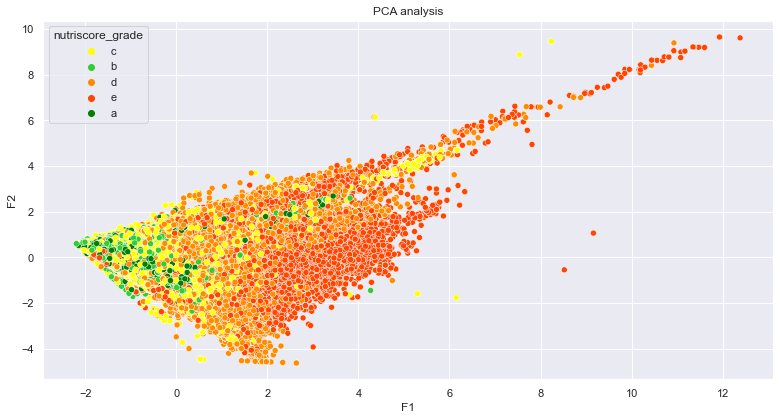

In [60]:
my_pal = {"a": "green", "b": "limegreen", "c":"yellow", "d":"darkorange", "e":"orangered"}
sns.scatterplot(x="F1", y="F2", hue="nutriscore_grade", data=new_data_subset_for_PCA, palette=my_pal)
plt.title('PCA analysis')
plt.tight_layout()

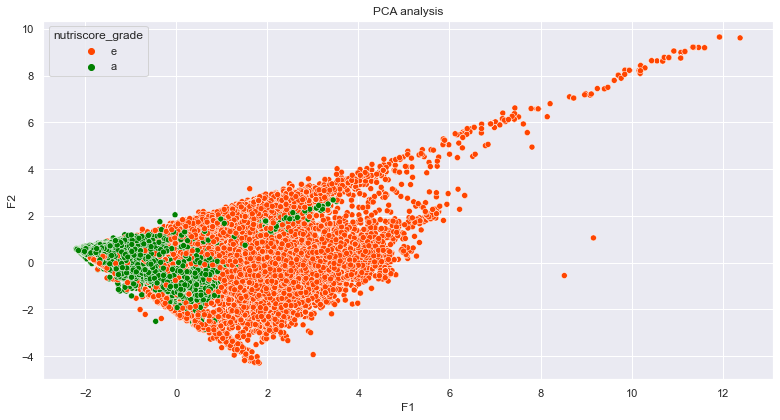

In [61]:
my_pal = {"a": "green", "b": "limegreen", "c":"yellow", "d":"darkorange", "e":"orangered"}
sns.scatterplot(x="F1", y="F2", hue="nutriscore_grade", data=new_data_subset_for_PCA.loc[new_data_subset_for_PCA['nutriscore_grade'].isin(['a', 'e'])], palette=my_pal)
plt.title('PCA analysis')
plt.tight_layout()


The PCA analysis showed that no clusters were observed, but certain tendency in F1 is observed. According to the nutriscore color classification, F1 tends to segregate the data, this is, the greater the value of F1, the greater the nutriscore, and the smaller the value of F1, the smaller the nutriscore.

Moreover in the correlation circle we oserved that the variable "energy_100" has a greater influence in the principal componente F1. 

### Anova analysis

Most use cases for ANOVA analyses are clinical trials. 

The one-way analysis of variance (ANOVA) is used to determine whether there are any statistically significant differences between the means of three or more independent (unrelated) groups. 

https://www.technologynetworks.com/informatics/articles/one-way-vs-two-way-anova-definition-differences-assumptions-and-hypotheses-306553

The difference between a sample statistic and a hypothesized value is statistically significant if a hypothesis test indicates it is too unlikely to have occurred by chance. To assess statistical significance, we examine the test's p-value. If the p-value is less than a specified significance level (α) (usually 0.10, 0.05, or 0.01), you can declare the difference to be statistically significant and reject the test's null hypothesis.

https://support.minitab.com/en-us/minitab-express/1/help-and-how-to/basic-statistics/inference/supporting-topics/basics/statistical-and-practical-significance/

How is this relevant to the Open Food Facts data? The usefulness of the ANOVA is to see if H0 is true: 

H0: The fat content is equal between products in groups "a" and "e" of the nutriscore classifications. **p value will confirm H0 or discard it.**

P-value ≤ "significance level 𝛂 = 0.05": The differences between some of the means are statistically significant. If the p-value is less than or equal to the significance level, you reject the null hypothesis and conclude that not all of population means are equal.

P-value > "significance level 𝛂 = 0.05": The differences between the means are not statistically significant. If the p-value is greater than the significance level, you do not have enough evidence to reject the null hypothesis that the population means are all equal. 

https://support.minitab.com/en-us/minitab-express/1/help-and-how-to/modeling-statistics/anova/how-to/one-way-anova/interpret-the-results/key-results/

For the ANOVA analysis we create a new data frame as follows.

In [62]:
data_for_anova = new_df_data_food_facts_filtered_by_relevant_variables.copy()

In [63]:
data_for_anova.describe()

,salt_100g,sodium_100g,cholesterol_100g,saturated-fat_100g,fat_100g,trans-fat_100g,sugars_100g,carbohydrates_100g,proteins_100g,fiber_100g,energy_100g,nutrition-score-fr_100g,number_of_countries_product_is_available,number_of_stores_product_is_available
count,213996.000000,213996.000000,213996.000000,213996.000000,213996.000000,213996.000000,213996.000000,213996.000000,213996.000000,213996.000000,213996.000000,213996.000000,213996.000000,213996.000000
mean,1.238011,0.495207,0.039340,4.075873,10.715881,0.033794,14.329648,32.021267,7.242566,1.851611,1052.934768,7.753416,1.018496,0.029416
std,3.725091,1.490036,1.109173,6.299592,13.521522,0.410913,19.087392,27.762173,8.060134,2.662877,688.246798,8.997143,0.165830,0.221845
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-14.000000,0.000000,0.000000
25%,0.137160,0.054864,0.000000,0.000000,0.220000,0.000000,1.300000,7.140000,1.639344,0.000000,402.000000,0.000000,1.000000,0.000000
50%,0.720000,0.288000,0.000000,1.250000,5.360000,0.000000,5.000000,22.350000,4.710000,1.000000,1046.000000,7.000000,1.000000,0.000000
75%,1.422400,0.568960,0.026000,6.160000,17.020000,0.000000,21.840000,56.250000,10.000000,2.900000,1582.000000,15.000000,1.000000,0.000000
max,100.000000,40.000000,116.915000,100.000000,100.000000,35.710000,100.000000,100.000000,90.910000,72.500000,13213.000000,38.000000,16.000000,12.000000


We keep certain columns that might be of interest for us to analyse that are included in the following list.

In [64]:
columns_for_anova = ['salt_100g', 'sodium_100g', 'cholesterol_100g', 'saturated-fat_100g', 'fat_100g', 'trans-fat_100g', 'sugars_100g', 'carbohydrates_100g', 
                        'proteins_100g', 'fiber_100g', 'energy_100g', 'nutrition-score-fr_100g', 'nutriscore_grade']

We create a data frame with that contains only the variables indicated in the previous list.

In [65]:
data_subset_for_anova = new_df_data_food_facts_filtered_by_relevant_variables[columns_for_anova]

In [66]:
data_subset_for_anova.describe()

,salt_100g,sodium_100g,cholesterol_100g,saturated-fat_100g,fat_100g,trans-fat_100g,sugars_100g,carbohydrates_100g,proteins_100g,fiber_100g,energy_100g,nutrition-score-fr_100g
count,213996.000000,213996.000000,213996.000000,213996.000000,213996.000000,213996.000000,213996.000000,213996.000000,213996.000000,213996.000000,213996.000000,213996.000000
mean,1.238011,0.495207,0.039340,4.075873,10.715881,0.033794,14.329648,32.021267,7.242566,1.851611,1052.934768,7.753416
std,3.725091,1.490036,1.109173,6.299592,13.521522,0.410913,19.087392,27.762173,8.060134,2.662877,688.246798,8.997143
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-14.000000
25%,0.137160,0.054864,0.000000,0.000000,0.220000,0.000000,1.300000,7.140000,1.639344,0.000000,402.000000,0.000000
50%,0.720000,0.288000,0.000000,1.250000,5.360000,0.000000,5.000000,22.350000,4.710000,1.000000,1046.000000,7.000000
75%,1.422400,0.568960,0.026000,6.160000,17.020000,0.000000,21.840000,56.250000,10.000000,2.900000,1582.000000,15.000000
max,100.000000,40.000000,116.915000,100.000000,100.000000,35.710000,100.000000,100.000000,90.910000,72.500000,13213.000000,38.000000


In [67]:
new_data_subset_for_anova = data_subset_for_anova.copy()

To run the ANOVA test we have decided to compare the fat content between products of nutriscore grade "a" and "e" (as previously indicated). Next we create a new data frame that contains products with such classifications.

In [68]:
df_subset_for_anova =  pd.DataFrame(new_data_subset_for_anova.loc[new_data_subset_for_anova['nutriscore_grade'].isin(['a','e'])])

### Distributions of Fat per 100g of product for the nutriscore grades "a" and "e"

We will look at the distributions of fat content per 100 g of product fo the nutriscore grades "a" and "e". 

In [69]:
def func_histogram_indicators_anova(data,column,x_label,graph_title,color):
    data[column].hist(bins=100,color=color)
    plt.xlabel(x_label)
    plt.ylabel('count')
    plt.title(graph_title)

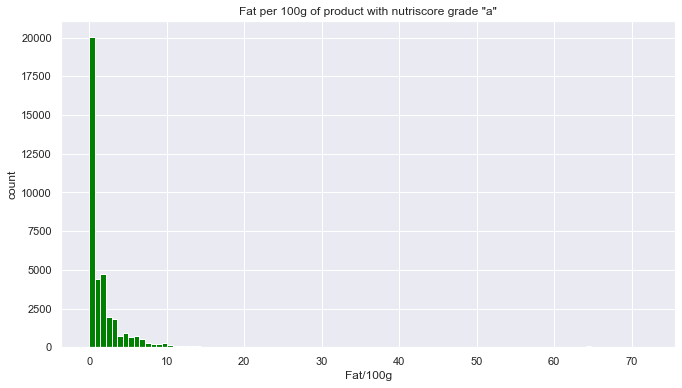

In [70]:
func_histogram_indicators_anova(df_subset_for_anova.loc[df_subset_for_anova['nutriscore_grade'].isin(['a'])],'fat_100g','Fat/100g','Fat per 100g of product with nutriscore grade "a"','green')

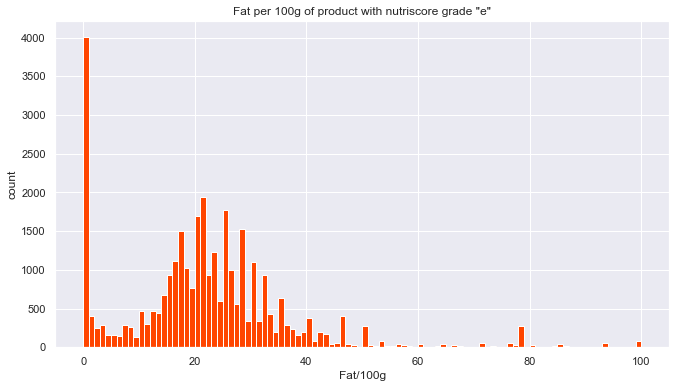

In [71]:
func_histogram_indicators_anova(df_subset_for_anova.loc[df_subset_for_anova['nutriscore_grade'].isin(['e'])],'fat_100g','Fat/100g','Fat per 100g of product with nutriscore grade "e"','orangered')

To run the ANOVA test the data is first standardized via z-score standardization. Then we create a new data frame for such procedure.

In [72]:
df_subset_for_anova_normalization = df_subset_for_anova.copy()

In [73]:
# normalize data for ANOVA
# See reference https://towardsdatascience.com/data-normalization-with-pandas-and-scikit-learn-7c1cc6ed6475

new_df_norm_for_anova = pd.DataFrame((df_subset_for_anova_normalization.drop(columns=['nutriscore_grade']) - df_subset_for_anova_normalization.drop(columns=['nutriscore_grade']).mean()) / df_subset_for_anova_normalization.drop(columns=['nutriscore_grade']).std())

In [74]:
new_df_norm_for_anova.describe()

,salt_100g,sodium_100g,cholesterol_100g,saturated-fat_100g,fat_100g,trans-fat_100g,sugars_100g,carbohydrates_100g,proteins_100g,fiber_100g,energy_100g,nutrition-score-fr_100g
count,7.136700e+04,7.136700e+04,7.136700e+04,7.136700e+04,7.136700e+04,7.136700e+04,7.136700e+04,7.136700e+04,7.136700e+04,7.136700e+04,7.136700e+04,7.136700e+04
mean,2.783571e-14,-9.029164e-15,1.033706e-14,1.286346e-14,-2.588113e-14,4.849787e-15,2.328102e-14,3.194477e-14,-6.401132e-14,-2.780311e-14,-1.414923e-15,-1.400345e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-5.457669e-01,-5.457672e-01,-3.263744e-02,-6.281008e-01,-7.521026e-01,-7.713139e-02,-7.788629e-01,-1.142494e+00,-8.493355e-01,-7.610060e-01,-1.343411e+00,-1.693567e+00
25%,-5.090655e-01,-5.090658e-01,-3.263744e-02,-6.281008e-01,-7.521026e-01,-7.713139e-02,-6.937050e-01,-8.856270e-01,-6.477094e-01,-7.610060e-01,-1.003399e+00,-9.154157e-01
50%,-2.671696e-01,-2.671698e-01,-3.263744e-02,-5.766159e-01,-5.629752e-01,-7.713139e-02,-5.168386e-01,-5.177910e-01,-2.977932e-01,-2.606647e-01,4.708616e-02,-6.819703e-01
75%,8.486400e-02,8.486393e-02,-1.704011e-02,5.213008e-01,6.355025e-01,-7.713139e-02,5.700167e-01,9.976412e-01,3.434505e-01,4.183699e-01,8.653990e-01,1.029963e+00
max,5.784290e+01,5.784292e+01,9.280874e+01,1.224314e+01,5.954544e+00,5.779505e+01,4.368278e+00,2.495845e+00,1.017060e+01,1.925265e+01,1.133853e+01,2.352820e+00


We create a new data frame with the standardized data that contains now the variable a column with the 'nutriscore_grade'.

In [75]:
new_df_norm_for_anova['nutriscore_grade'] = df_subset_for_anova_normalization['nutriscore_grade']

In [76]:
new_df_norm_for_anova.head()

,salt_100g,sodium_100g,cholesterol_100g,saturated-fat_100g,fat_100g,trans-fat_100g,sugars_100g,carbohydrates_100g,proteins_100g,fiber_100g,energy_100g,nutrition-score-fr_100g,nutriscore_grade
1096,-0.427321,-0.427322,-0.011841,1.823870,1.483223,-0.077131,2.340319,0.936453,-0.272337,-0.761006,1.437584,1.419038,e
1098,-0.378942,-0.378942,-0.010974,2.589709,1.930556,-0.077131,1.950558,0.676676,0.059800,-0.761006,1.709086,1.574669,e
1101,-0.545767,-0.545767,-0.032637,1.211199,1.403414,-0.077131,1.560796,0.936453,-0.849336,1.776439,1.310713,0.952147,e
1115,-0.427321,-0.427322,-0.020506,1.946147,1.355796,-0.077131,2.184742,0.936453,-0.157180,0.275415,1.539080,1.185593,e
1137,-0.535757,-0.535758,-0.032637,-0.628101,-0.752103,-0.077131,-0.712265,-1.009330,-0.701449,0.096722,-1.248259,-0.759785,a


The following distributions show the fat content per 100 g of product for the nutriscore categories "a" and "e" of the standardized data.

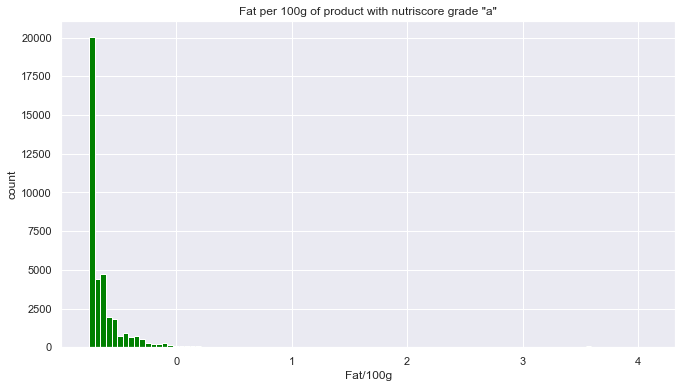

In [77]:
func_histogram_indicators_anova(new_df_norm_for_anova.loc[new_df_norm_for_anova['nutriscore_grade'].isin(['a'])],'fat_100g','Fat/100g','Fat per 100g of product with nutriscore grade "a"','green')


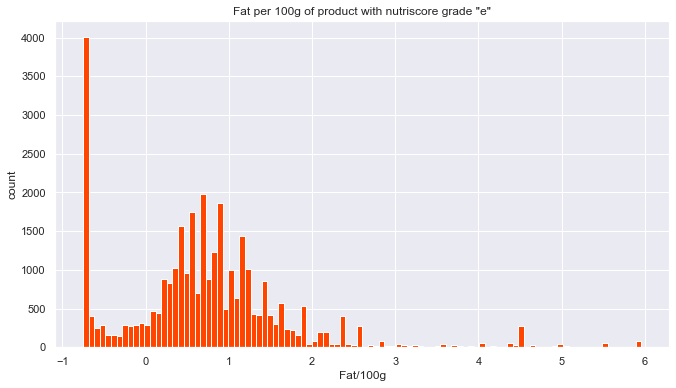

In [78]:
func_histogram_indicators_anova(new_df_norm_for_anova.loc[new_df_norm_for_anova['nutriscore_grade'].isin(['e'])],'fat_100g','Fat/100g','Fat per 100g of product with nutriscore grade "e"','orangered')

To run the ANOVA test we used Pingouin. Pingouin is an open-source statistical package written in Python 3 and based mostly on Pandas and NumPy. For more information, consult the following references:

https://pingouin-stats.org/index.html

https://pingouin-stats.org/generated/pingouin.anova.html

The ANOVA summary:

* 'Source': Factor names
* 'SS': Sums of squares
* 'DF': Degrees of freedom
* 'MS': Mean squares
* 'F': F-values
* 'p-unc': uncorrected p-values
* 'np2': Partial eta-square effect sizes

In [79]:
anova_analysis = pg.anova(data=new_df_norm_for_anova, dv='fat_100g', between='nutriscore_grade', detailed=True)
pg.print_table(anova_analysis)


ANOVA SUMMARY

Source                   SS     DF         MS          F    p-unc      np2
----------------  ---------  -----  ---------  ---------  -------  -------
nutriscore_grade  31506.803      1  31506.803  56410.645    0.000    0.441
Within            39859.197  71365      0.559    nan      nan      nan



According to the previous result, the uncorrected p-value is less than the significance level 𝛂 = 0.05. This is, the differences between the means of fat content per 100 g of the nutriscore classification "a" and "e" are statistically significant. We then reject the null hypothesis and conclude that not all of population means are equal.